### 딥-러닝 과정 CNN | 2020.02.27. 

### 첫번째 실습. Keras 모델 생성/학습 - MNIST : MLP
[Keras Dataset](https://keras.io/ko/datasets/#mnist)

In [1]:
# 1. 데이터 불러오기
#!pip install keras
import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [3]:
# 2. 이미지 데이터 확인하기 🖼
import matplotlib.pyplot as plt

image = x_train[4555]
plt.imshow(image, cmap=plt.cm.gray)
print(y_train[4555])

9


In [4]:
# 3-1. 이미지 데이터 전처리 : 2차원->1차원 🌟🌟🌟
x_train_re = x_train.reshape((60000, 28*28))
x_test_re = x_test.reshape((10000, 28*28))

print(x_train_re.shape)
print(x_test_re.shape)

(60000, 784)
(10000, 784)


In [5]:
# 3-2. 이미지 데이터 전처리 : Normalzation 
x_train_re = x_train_re / 255
x_test_re = x_test_re / 255

print(x_train_re)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
# 4. Label 전처리 (one-hot encoding) 
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [7]:
from keras.utils import to_categorical
y_train_enco = to_categorical(y_train)
y_test_enco = to_categorical(y_test)

print(y_train_enco[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [50]:
# 5. 모델 생성 : MLP
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim = 784, activation = 'relu'))
#model.add(Dense(32, activation = 'relu'))
#model.add(Dense(64, activation = 'relu'))
#model.add(Dense(16, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [51]:
# 6. Compile - Optimizer, Loss function 설정
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [52]:
# 7. 모델 학습시키기
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=5)

history = model.fit(x_train_re, y_train_enco, nb_epoch = 50, verbose=1, validation_split=0.3, callbacks = [early_stop])

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 5s 115us/step - loss: 0.5252 - accuracy: 0.8528 - val_loss: 0.2990 - val_accuracy: 0.9123
Epoch 2/50
42000/42000 [==============================] - 5s 112us/step - loss: 0.2683 - accuracy: 0.9249 - val_loss: 0.2562 - val_accuracy: 0.9270
Epoch 3/50
42000/42000 [==============================] - 5s 111us/step - loss: 0.2338 - accuracy: 0.9332 - val_loss: 0.2370 - val_accuracy: 0.9338
Epoch 4/50
42000/42000 [==============================] - 5s 111us/step - loss: 0.2134 - accuracy: 0.9395 - val_loss: 0.2293 - val_accuracy: 0.9369
Epoch 5/50
42000/42000 [==============================] - 5s 110us/step - loss: 0.1990 - accuracy: 0.9419 - val_loss: 0.2253 - val_accuracy: 0.9364
Epoch 6/50
42000/42000 [==============================] - 5s 112us/step - loss: 0.1877 - accuracy: 0.9450 - val_loss: 0.2284 - val_accuracy: 0.9367
Epoch 7/50
42000/42000 [==============================] - 5s 1

In [53]:
# 8. 모델 평가하기
train_acc = model.evaluate(x_train_re, y_train_enco)
test_acc  = model.evaluate(x_test_re, y_test_enco)

print(train_acc)
print(test_acc)

10000/10000 [==============================] - 1s 54us/step
[0.12166628239533553, 0.9683666825294495]
[0.22133120405767112, 0.944599986076355]


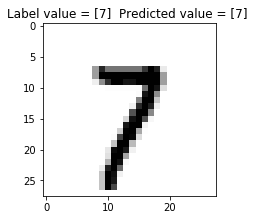

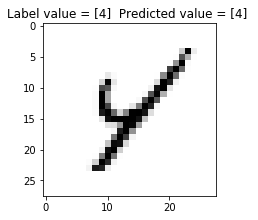

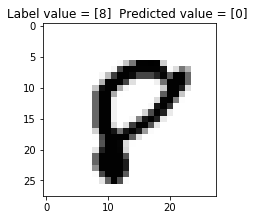

In [56]:
# 9. 이미지를 랜덤으로 선택해 훈련된 모델로 예측 🖼

import numpy
for index in numpy.random.choice(len(y_test), 3, replace = False):
    predicted = model.predict(x_test_re[index:index + 1])[0]
    label = y_test_enco[index]
    result_label = numpy.where(label == numpy.amax(label))
    result_predicted = numpy.where(predicted == numpy.amax(predicted))
    title = "Label value = %s  Predicted value = %s " % (result_label[0], result_predicted[0])
    
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    images = x_test_re
    plt.imshow(images[index].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
    plt.show()

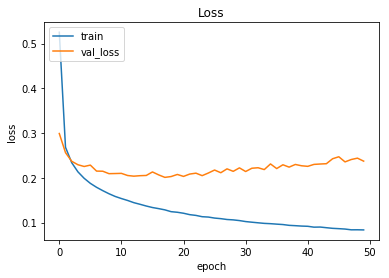

In [57]:
# 10. 학습 시각화하기
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc = 'upper left')
plt.show()

In [60]:
predicted = model.predict(x_test_re[index:index + 1])[0]
predicted

array([7.8646886e-01, 3.1720954e-18, 9.3414985e-02, 3.7253979e-08,
       4.4424880e-11, 7.4834245e-09, 1.2187979e-06, 8.1934305e-03,
       1.0875880e-01, 3.1626890e-03], dtype=float32)

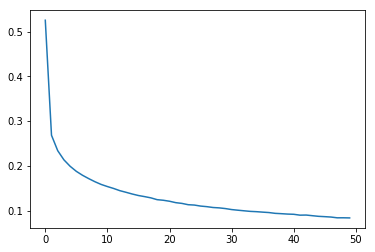

In [61]:
plt.plot(history.history['loss'])

In [62]:
plt.plot(history.history['loss'])

TypeError: 'History' object is not subscriptable